In [25]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL target
url = 'https://www.businessofapps.com/data/indonesia-app-market/'

# Mendapatkan HTML dari URL
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Mencari tabel berdasarkan ID
table = soup.find('table', {'id': 'footable_91303'})

# Mendapatkan judul kolom
headers = table.find_all('th')
column_names = [header.text.strip() for header in headers]

# Mendapatkan data baris
rows = table.find_all('tr')[1:]  # Mengabaikan baris pertama karena itu adalah header

data = []
for row in rows:
    row_data = []
    cells = row.find_all('td')
    for cell in cells:
        row_data.append(cell.text.strip())
    data.append(row_data)

# Membuat dataframe menggunakan pandas
df = pd.DataFrame(data, columns=column_names)

# Menampilkan dataframe
df

,App,Downloads (mm)
0,TikTok,67.4
1,CapCut,53.9
2,Instagram,50.6
3,Facebook,52.8
4,Shopee,42.5
5,WhatsApp,38.6
6,DANA Digital Wallet,33
7,WhatsApp Business,28.1
8,GoTube,26
9,SHAREit,25.5


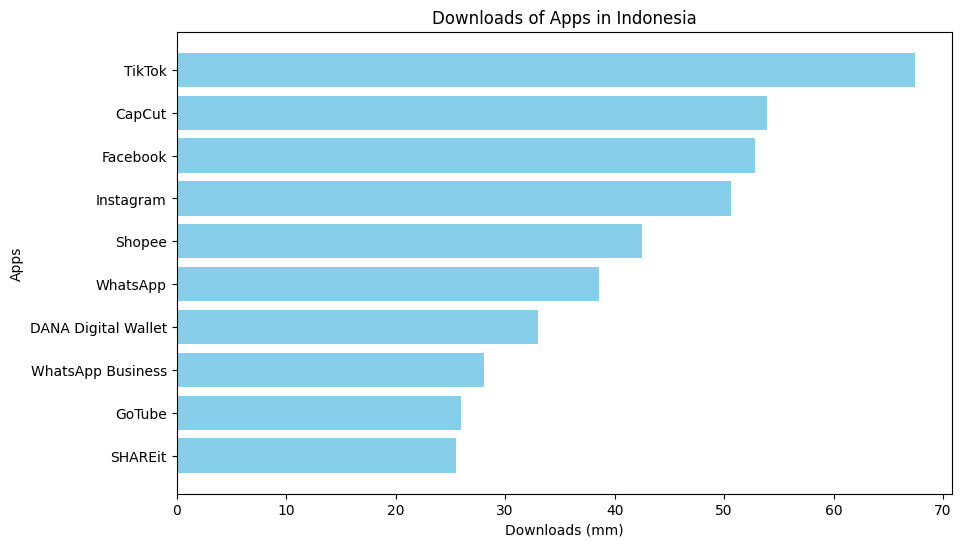

In [6]:
import matplotlib.pyplot as plt

# Data
sorted_df = df.sort_values(by='Downloads (mm)', ascending=True)
apps = sorted_df['App']
downloads = sorted_df['Downloads (mm)'].astype(float)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(apps, downloads, color='skyblue')
plt.xlabel('Downloads (mm)')
plt.ylabel('Apps')
plt.title('Downloads of Apps in Indonesia')
plt.show()


In [10]:
from google.colab import files

file_path = '/content/app-market-indo-data.csv'
df.to_csv(file_path, index=False)

# Download file dari google colab
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>